<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/bigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NURFARRAHIN CHE ALIAS (A20EC0121)
NUR IRDINA ALIAH BINTI ABDUL WAHAB (A20EC0115)

In [ ]:
! pip install kaggle



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farrahin","key":"5aa8183437adeebcb7bb1e62642fad15"}'}

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
 ! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data

 99% 1.77G/1.78G [00:15<00:00, 117MB/s]
100% 1.78G/1.78G [00:15<00:00, 126MB/s]


In [ ]:
!unzip nyc-yellow-taxi-trip-data.zip

Archive:  nyc-yellow-taxi-trip-data.zip
  inflating: yellow_tripdata_2015-01.csv  
  inflating: yellow_tripdata_2016-01.csv  
  inflating: yellow_tripdata_2016-02.csv  
  inflating: yellow_tripdata_2016-03.csv  


In [ ]:
import pandas 
import random

filename = "/content/yellow_tripdata_2016-03.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pandas.read_csv(filename, skiprows=skip)
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
1,1,2016-03-01 00:00:04,2016-03-01 00:06:11,1,0.60,-73.999413,40.738564,1,N,-74.002457,40.745327,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80
2,2,2016-03-01 00:00:08,2016-03-01 00:16:31,4,4.26,-74.007942,40.706268,1,N,-73.956421,40.718899,2,16.0,0.5,0.5,0.00,0.0,0.3,17.30
3,1,2016-03-01 00:00:11,2016-03-01 00:13:49,2,3.70,-73.951225,40.782772,1,N,-73.988953,40.748260,1,13.5,0.5,0.5,2.95,0.0,0.3,17.75
4,2,2016-03-01 00:00:14,2016-03-01 00:16:37,1,4.26,-73.961700,40.654949,1,N,-73.936127,40.697720,1,15.5,0.5,0.5,2.00,0.0,0.3,18.80


In [ ]:
import pandas as pd
fare_amount_max = []

for reader in pd.read_csv('/content/yellow_tripdata_2016-03.csv', chunksize=100000):
    # do any processing on reader
    fare_amount_max.append(reader['fare_amount'].max())
    

In [ ]:
max(fare_amount_max)


429496.72

## Big Data Scalling

---



reduce data type


In [ ]:
#efore 
import pandas as pd
df = pd.read_csv('/content/yellow_tripdata_2016-03.csv')
df.dtypes


VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [ ]:

df.memory_usage().sum()/(1024*1024*1024)

1.7285950779914856

In [ ]:
import pandas as pd
import numpy as np

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
df_new = reduce_mem_usage(df)

Memory usage of dataframe is 1.73 MB
Memory usage after optimization is: 0.65 MB
Decreased by 62.3%


In [ ]:
df_new.dtypes


VendorID                     int8
tpep_pickup_datetime     category
tpep_dropoff_datetime    category
passenger_count              int8
trip_distance             float32
pickup_longitude          float16
pickup_latitude           float16
RatecodeID                   int8
store_and_fwd_flag       category
dropoff_longitude         float16
dropoff_latitude          float16
payment_type                 int8
fare_amount               float32
extra                     float16
mta_tax                   float16
tip_amount                float16
tolls_amount              float16
improvement_surcharge     float16
total_amount              float32
dtype: object

**Technique** #1: Don’t load all the columns

In [ ]:
>>> import pandas as pd
>>> df = pd.read_csv("yellow_tripdata_2016-03.csv")
>>> df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Columns: 19 entries, VendorID to total_amount
dtypes: float64(12), int64(4), object(3)
memory usage: 3.8 GB


Technique #2: Shrink numerical columns with smaller dtypes

In [ ]:
 import pandas as pd
 df = pd.read_csv("yellow_tripdata_2016-03.csv")
df["fare_amount"].memory_usage(index=False, deep=True)

97687616

In [ ]:
df["fare_amount"].max()

429496.72

In [ ]:
df["fare_amount"].min()

-376.0

In [ ]:
df = pd.read_csv("yellow_tripdata_2016-03.csv", dtype={"fare_amount": "float16"})
df["fare_amount"].memory_usage(index=False, deep=True)

24421904

Technique #3: Shrink categorical data using Categorical dtypes


In [ ]:
df = pd.read_csv(
...     "yellow_tripdata_2016-03.csv", dtype={"VendorID": "int8"})

In [ ]:
df["VendorID"].head(5)

0    1
1    1
2    2
3    2
4    2
Name: VendorID, dtype: int8

Technique #4: Sparse series


In [ ]:
df.memory_usage(index=False, deep=True)

VendorID                  12210952
tpep_pickup_datetime     928032352
tpep_dropoff_datetime    928032352
passenger_count           97687616
trip_distance             97687616
pickup_longitude          97687616
pickup_latitude           97687616
RatecodeID                97687616
store_and_fwd_flag       708235216
dropoff_longitude         97687616
dropoff_latitude          97687616
payment_type              97687616
fare_amount               97687616
extra                     97687616
mta_tax                   97687616
tip_amount                97687616
tolls_amount              97687616
improvement_surcharge     97687616
total_amount              97687616
dtype: int64

## Data Cleaning

---



In [ ]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
pickup_longitude         0.0
pickup_latitude          0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
dropoff_longitude        0.0
dropoff_latitude         0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
dtype: float64



In [ ]:
print("Column datatypes: ")
print(df.dtypes)


Column datatypes: 
VendorID                    int8
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


In [ ]:
# names of the columns
columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount']
   

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    df[column] = df[column].fillna("")

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df['tpep_pickup_datetime'].unique()

array(['2016-03-01 00:00:00', '2016-03-01 00:00:01',
       '2016-03-01 00:00:02', ..., '2016-03-31 23:59:58',
       '2016-03-31 23:59:59', '2016-03-20 08:45:16'], dtype=object)

In [ ]:
df['improvement_surcharge'].unique()

array([ 0.3 ,  0.  , -0.3 ,  0.23,  0.18,  0.2 ,  0.19,  0.17,  0.1 ,
        0.08])

In [ ]:
df = df.drop_duplicates( keep='last',inplace = True)

## Data Visualisation

---



Exploratory Analysis and Visualization
This section will shows steps and details of the calculation below:

Determining the mean, sum, range and other interesting statistics for numeric columns
Calculation distributions of numeric columns using histograms.
Explaining the relationship between columns using scatter plots and bar charts.

Graph 1 Count plot for Top 10 Car brand.

Graph 2 KDE plot to determine the average horsepower of a car.

Graph 3 Barplot and pie chart to show fueltype of car

Graph 4 Histplot for car mileage

Graph 5 Heatmap graph and Lmplot to show correlation between price and other factors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data = pd.read_csv( '/content/yellow_tripdata_2016-03.csv')

print(data.head())
print(data.shape)
print(data.info)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1

Text(0.5, 1.0, 'Average Tip Amount')

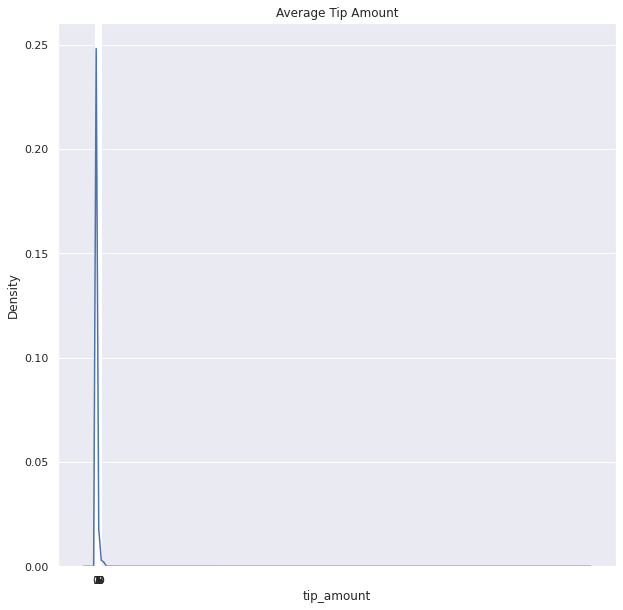

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(range(0, 10, 1))
sns.kdeplot(x = 'tip_amount',data = pd.read_csv( '/content/yellow_tripdata_2016-03.csv'))
plt.title("Average Tip Amount")

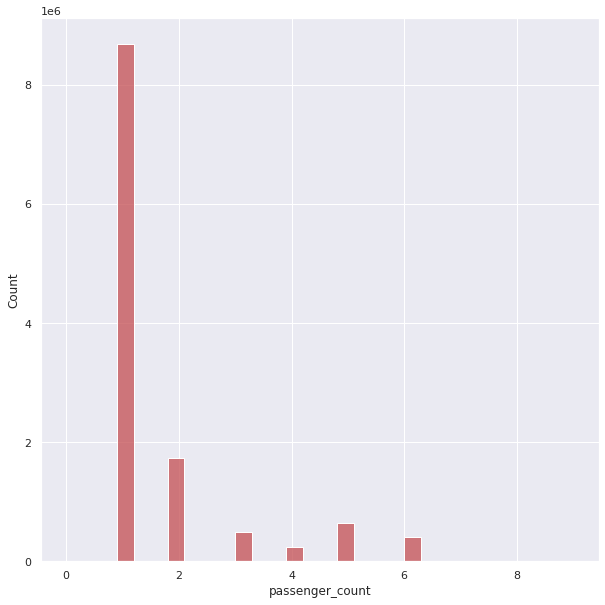

In [ ]:
sns.histplot(data=pd.read_csv( '/content/yellow_tripdata_2016-03.csv'), x='passenger_count',bins=30,color = 'r')

In [ ]:
data=pd.read_csv( '/content/yellow_tripdata_2016-03.csv')

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data=pd.read_csv( '/content/yellow_tripdata_2016-03.csv')

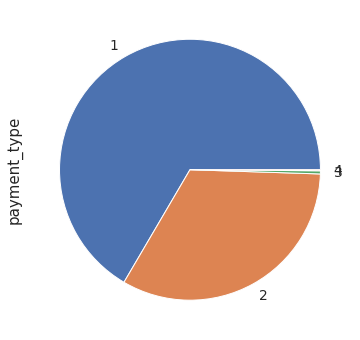

In [ ]:
data['payment_type'].value_counts().plot(kind='pie', figsize=(6,6))

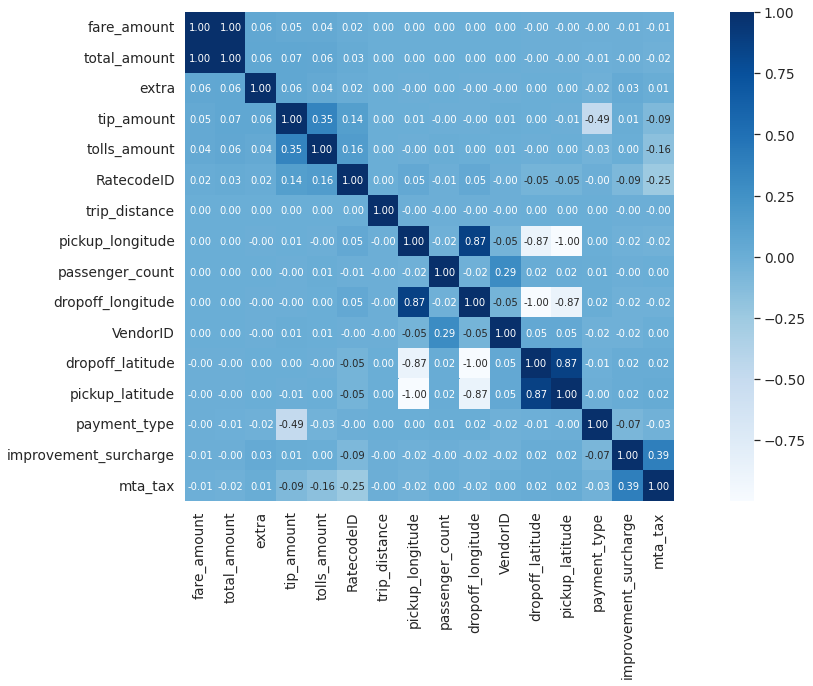

In [ ]:
data=pd.read_csv( '/content/yellow_tripdata_2016-03.csv')
corr = data.corr()
plt.figure(figsize=(20, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'fare_amount')['fare_amount'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [ ]:
sns.lmplot(data=pd.read_csv( '/content/yellow_tripdata_2016-03.csv'),x='passenger_count',y='total_amount')